# Train and test the model

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


# Data

In [2]:
# load data
f_path = 'c_data_1A.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [3]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'c_testdata_1A.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

C:\Users\Ruining\.conda\envs\machine_learning\lib\site-packages\pandas\core\generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [4]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# one hot code y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model

In [5]:
# Build model
model = classifier()

# compile model
ad = optimizers.Adam(lr=0.00005)
model.compile(loss='categorical_crossentropy', optimizer=ad, metrics=['accuracy'])

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1d_1/convolution/Conv2D}}]]

In [ ]:
# Save the raw classifier
model.save('classify0.h5')  # creates a HDF5 file 'my_model.h5'

In [14]:
# fit network

epoch = 150
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='val_acc',verbose=1,min_delta=0.5,patience=30,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Instructions for updating:
Use tf.cast instead.
Train on 10599 samples, validate on 2650 samples
Epoch 1/150
 6755/10599 [==================>...........] - ETA: 12:27 - loss: 0.8478 - acc: 0.80 - ETA: 2:24 - loss: 1.3430 - acc: 0.6667 - ETA: 1:21 - loss: 1.5033 - acc: 0.616 - ETA: 57s - loss: 1.5198 - acc: 0.652 - ETA: 47s - loss: 1.4681 - acc: 0.65 - ETA: 40s - loss: 1.3723 - acc: 0.66 - ETA: 37s - loss: 1.2917 - acc: 0.67 - ETA: 34s - loss: 1.1652 - acc: 0.69 - ETA: 31s - loss: 1.1089 - acc: 0.70 - ETA: 29s - loss: 1.0846 - acc: 0.72 - ETA: 28s - loss: 1.0197 - acc: 0.74 - ETA: 28s - loss: 0.9789 - acc: 0.75 - ETA: 27s - loss: 0.9215 - acc: 0.76 - ETA: 26s - loss: 0.8854 - acc: 0.76 - ETA: 26s - loss: 0.8732 - acc: 0.76 - ETA: 25s - loss: 0.8469 - acc: 0.76 - ETA: 24s - loss: 0.8186 - acc: 0.77 - ETA: 23s - loss: 0.8020 - acc: 0.77 - ETA: 23s - loss: 0.7875 - acc: 0.78 - ETA: 23s - loss: 0.7669 - acc: 0.78 - ETA: 23s - loss: 0.7514 - acc: 0.79 - ETA: 22s - loss: 0.7397 - acc: 0.79 - 

 6580/10599 [=================>............] - ETA: 50s - loss: 1.3229e-04 - acc: 1.00 - ETA: 22s - loss: 5.3567e-04 - acc: 1.00 - ETA: 19s - loss: 0.0096 - acc: 1.0000   - ETA: 19s - loss: 0.0093 - acc: 1.00 - ETA: 19s - loss: 0.0073 - acc: 1.00 - ETA: 19s - loss: 0.0083 - acc: 1.00 - ETA: 18s - loss: 0.0076 - acc: 1.00 - ETA: 18s - loss: 0.0066 - acc: 1.00 - ETA: 18s - loss: 0.0058 - acc: 1.00 - ETA: 18s - loss: 0.0067 - acc: 1.00 - ETA: 18s - loss: 0.0063 - acc: 1.00 - ETA: 18s - loss: 0.0060 - acc: 1.00 - ETA: 18s - loss: 0.0063 - acc: 1.00 - ETA: 18s - loss: 0.0062 - acc: 1.00 - ETA: 17s - loss: 0.0061 - acc: 1.00 - ETA: 17s - loss: 0.0057 - acc: 1.00 - ETA: 17s - loss: 0.0063 - acc: 1.00 - ETA: 17s - loss: 0.0061 - acc: 1.00 - ETA: 17s - loss: 0.0059 - acc: 1.00 - ETA: 17s - loss: 0.0060 - acc: 1.00 - ETA: 17s - loss: 0.0062 - acc: 1.00 - ETA: 17s - loss: 0.0062 - acc: 1.00 - ETA: 17s - loss: 0.0063 - acc: 1.00 - ETA: 17s - loss: 0.0064 - acc: 1.00 - ETA: 17s - loss: 0.0062 - acc

10599/10599 [==============================] - ETA: 6s - loss: 0.0139 - acc: 0.997 - ETA: 6s - loss: 0.0138 - acc: 0.997 - ETA: 6s - loss: 0.0138 - acc: 0.997 - ETA: 6s - loss: 0.0138 - acc: 0.997 - ETA: 6s - loss: 0.0137 - acc: 0.997 - ETA: 6s - loss: 0.0136 - acc: 0.997 - ETA: 6s - loss: 0.0136 - acc: 0.997 - ETA: 6s - loss: 0.0135 - acc: 0.997 - ETA: 6s - loss: 0.0135 - acc: 0.997 - ETA: 6s - loss: 0.0134 - acc: 0.997 - ETA: 6s - loss: 0.0134 - acc: 0.997 - ETA: 6s - loss: 0.0134 - acc: 0.997 - ETA: 6s - loss: 0.0133 - acc: 0.997 - ETA: 6s - loss: 0.0133 - acc: 0.997 - ETA: 6s - loss: 0.0133 - acc: 0.997 - ETA: 6s - loss: 0.0132 - acc: 0.997 - ETA: 6s - loss: 0.0132 - acc: 0.997 - ETA: 5s - loss: 0.0132 - acc: 0.997 - ETA: 5s - loss: 0.0131 - acc: 0.997 - ETA: 5s - loss: 0.0131 - acc: 0.997 - ETA: 5s - loss: 0.0130 - acc: 0.997 - ETA: 5s - loss: 0.0130 - acc: 0.997 - ETA: 5s - loss: 0.0130 - acc: 0.997 - ETA: 5s - loss: 0.0130 - acc: 0.997 - ETA: 5s - loss: 0.0129 - acc: 0.997 - ETA

 5840/10599 [===============>..............] - ETA: 16s - loss: 0.0013 - acc: 1.00 - ETA: 19s - loss: 2.1180e-04 - acc: 1.00 - ETA: 18s - loss: 1.1654e-04 - acc: 1.00 - ETA: 18s - loss: 9.1539e-05 - acc: 1.00 - ETA: 18s - loss: 1.4749e-04 - acc: 1.00 - ETA: 18s - loss: 1.9072e-04 - acc: 1.00 - ETA: 18s - loss: 2.2729e-04 - acc: 1.00 - ETA: 18s - loss: 2.3711e-04 - acc: 1.00 - ETA: 18s - loss: 2.4942e-04 - acc: 1.00 - ETA: 18s - loss: 2.4172e-04 - acc: 1.00 - ETA: 18s - loss: 2.3646e-04 - acc: 1.00 - ETA: 18s - loss: 2.5757e-04 - acc: 1.00 - ETA: 18s - loss: 2.3682e-04 - acc: 1.00 - ETA: 18s - loss: 2.2056e-04 - acc: 1.00 - ETA: 17s - loss: 2.1425e-04 - acc: 1.00 - ETA: 17s - loss: 2.1479e-04 - acc: 1.00 - ETA: 17s - loss: 2.1429e-04 - acc: 1.00 - ETA: 17s - loss: 2.0807e-04 - acc: 1.00 - ETA: 17s - loss: 2.0918e-04 - acc: 1.00 - ETA: 17s - loss: 1.9840e-04 - acc: 1.00 - ETA: 17s - loss: 2.0274e-04 - acc: 1.00 - ETA: 17s - loss: 2.0491e-04 - acc: 1.00 - ETA: 17s - loss: 1.9706e-04 - acc

10599/10599 [==============================] - ETA: 8s - loss: 1.2612e-04 - acc: 1.000 - ETA: 8s - loss: 1.2598e-04 - acc: 1.000 - ETA: 8s - loss: 1.2607e-04 - acc: 1.000 - ETA: 8s - loss: 1.2550e-04 - acc: 1.000 - ETA: 8s - loss: 1.2488e-04 - acc: 1.000 - ETA: 8s - loss: 1.2459e-04 - acc: 1.000 - ETA: 7s - loss: 1.2415e-04 - acc: 1.000 - ETA: 7s - loss: 1.2369e-04 - acc: 1.000 - ETA: 7s - loss: 1.2354e-04 - acc: 1.000 - ETA: 7s - loss: 1.2338e-04 - acc: 1.000 - ETA: 7s - loss: 1.2303e-04 - acc: 1.000 - ETA: 7s - loss: 1.2258e-04 - acc: 1.000 - ETA: 7s - loss: 1.2276e-04 - acc: 1.000 - ETA: 7s - loss: 1.2291e-04 - acc: 1.000 - ETA: 7s - loss: 1.2245e-04 - acc: 1.000 - ETA: 7s - loss: 1.2189e-04 - acc: 1.000 - ETA: 7s - loss: 1.2165e-04 - acc: 1.000 - ETA: 7s - loss: 1.2115e-04 - acc: 1.000 - ETA: 7s - loss: 1.2071e-04 - acc: 1.000 - ETA: 7s - loss: 1.2076e-04 - acc: 1.000 - ETA: 7s - loss: 1.2031e-04 - acc: 1.000 - ETA: 7s - loss: 1.2030e-04 - acc: 1.000 - ETA: 7s - loss: 1.1976e-04 - 

 5810/10599 [===============>..............] - ETA: 16s - loss: 5.4836e-07 - acc: 1.00 - ETA: 19s - loss: 8.5514e-06 - acc: 1.00 - ETA: 18s - loss: 5.0613e-06 - acc: 1.00 - ETA: 18s - loss: 6.0231e-06 - acc: 1.00 - ETA: 18s - loss: 8.0836e-06 - acc: 1.00 - ETA: 18s - loss: 7.1909e-06 - acc: 1.00 - ETA: 18s - loss: 7.0111e-06 - acc: 1.00 - ETA: 18s - loss: 7.8239e-06 - acc: 1.00 - ETA: 18s - loss: 8.1737e-06 - acc: 1.00 - ETA: 18s - loss: 8.5772e-06 - acc: 1.00 - ETA: 18s - loss: 9.5055e-06 - acc: 1.00 - ETA: 18s - loss: 8.7048e-06 - acc: 1.00 - ETA: 17s - loss: 8.8258e-06 - acc: 1.00 - ETA: 17s - loss: 8.1774e-06 - acc: 1.00 - ETA: 17s - loss: 8.9056e-06 - acc: 1.00 - ETA: 17s - loss: 8.6396e-06 - acc: 1.00 - ETA: 17s - loss: 8.2663e-06 - acc: 1.00 - ETA: 17s - loss: 7.8881e-06 - acc: 1.00 - ETA: 17s - loss: 7.7593e-06 - acc: 1.00 - ETA: 17s - loss: 7.8538e-06 - acc: 1.00 - ETA: 17s - loss: 8.0829e-06 - acc: 1.00 - ETA: 17s - loss: 8.5759e-06 - acc: 1.00 - ETA: 17s - loss: 8.8824e-06 -

10599/10599 [==============================] - ETA: 8s - loss: 7.6150e-06 - acc: 1.000 - ETA: 8s - loss: 7.5888e-06 - acc: 1.000 - ETA: 8s - loss: 7.5531e-06 - acc: 1.000 - ETA: 8s - loss: 7.5563e-06 - acc: 1.000 - ETA: 8s - loss: 7.5674e-06 - acc: 1.000 - ETA: 8s - loss: 7.5327e-06 - acc: 1.000 - ETA: 8s - loss: 7.5236e-06 - acc: 1.000 - ETA: 7s - loss: 7.5122e-06 - acc: 1.000 - ETA: 7s - loss: 7.5347e-06 - acc: 1.000 - ETA: 7s - loss: 7.5055e-06 - acc: 1.000 - ETA: 7s - loss: 7.5297e-06 - acc: 1.000 - ETA: 7s - loss: 7.5318e-06 - acc: 1.000 - ETA: 7s - loss: 7.5038e-06 - acc: 1.000 - ETA: 7s - loss: 7.4688e-06 - acc: 1.000 - ETA: 7s - loss: 7.4579e-06 - acc: 1.000 - ETA: 7s - loss: 7.4266e-06 - acc: 1.000 - ETA: 7s - loss: 7.3957e-06 - acc: 1.000 - ETA: 7s - loss: 7.3854e-06 - acc: 1.000 - ETA: 7s - loss: 7.3645e-06 - acc: 1.000 - ETA: 7s - loss: 7.3685e-06 - acc: 1.000 - ETA: 7s - loss: 7.3358e-06 - acc: 1.000 - ETA: 7s - loss: 7.3034e-06 - acc: 1.000 - ETA: 7s - loss: 7.3010e-06 - 

 5810/10599 [===============>..............] - ETA: 16s - loss: 6.0678e-06 - acc: 1.00 - ETA: 18s - loss: 3.8999e-06 - acc: 1.00 - ETA: 18s - loss: 2.2210e-06 - acc: 1.00 - ETA: 18s - loss: 1.7932e-06 - acc: 1.00 - ETA: 18s - loss: 1.7867e-06 - acc: 1.00 - ETA: 18s - loss: 1.6443e-06 - acc: 1.00 - ETA: 18s - loss: 1.5224e-06 - acc: 1.00 - ETA: 17s - loss: 1.3659e-06 - acc: 1.00 - ETA: 17s - loss: 1.3558e-06 - acc: 1.00 - ETA: 17s - loss: 1.4253e-06 - acc: 1.00 - ETA: 17s - loss: 1.5239e-06 - acc: 1.00 - ETA: 17s - loss: 1.4197e-06 - acc: 1.00 - ETA: 17s - loss: 1.3131e-06 - acc: 1.00 - ETA: 17s - loss: 1.2475e-06 - acc: 1.00 - ETA: 17s - loss: 1.1725e-06 - acc: 1.00 - ETA: 17s - loss: 1.1544e-06 - acc: 1.00 - ETA: 17s - loss: 1.1710e-06 - acc: 1.00 - ETA: 17s - loss: 1.1100e-06 - acc: 1.00 - ETA: 17s - loss: 1.0835e-06 - acc: 1.00 - ETA: 17s - loss: 1.0552e-06 - acc: 1.00 - ETA: 17s - loss: 1.0572e-06 - acc: 1.00 - ETA: 17s - loss: 1.1138e-06 - acc: 1.00 - ETA: 17s - loss: 1.0722e-06 -

10599/10599 [==============================] - ETA: 8s - loss: 7.7312e-07 - acc: 1.000 - ETA: 8s - loss: 7.6978e-07 - acc: 1.000 - ETA: 8s - loss: 7.6796e-07 - acc: 1.000 - ETA: 8s - loss: 7.7573e-07 - acc: 1.000 - ETA: 8s - loss: 7.7977e-07 - acc: 1.000 - ETA: 8s - loss: 7.7656e-07 - acc: 1.000 - ETA: 8s - loss: 7.7506e-07 - acc: 1.000 - ETA: 8s - loss: 7.7262e-07 - acc: 1.000 - ETA: 7s - loss: 7.7236e-07 - acc: 1.000 - ETA: 7s - loss: 7.7186e-07 - acc: 1.000 - ETA: 7s - loss: 7.7218e-07 - acc: 1.000 - ETA: 7s - loss: 7.6939e-07 - acc: 1.000 - ETA: 7s - loss: 7.6632e-07 - acc: 1.000 - ETA: 7s - loss: 7.6321e-07 - acc: 1.000 - ETA: 7s - loss: 7.6214e-07 - acc: 1.000 - ETA: 7s - loss: 7.5912e-07 - acc: 1.000 - ETA: 7s - loss: 7.5929e-07 - acc: 1.000 - ETA: 7s - loss: 7.5842e-07 - acc: 1.000 - ETA: 7s - loss: 7.5582e-07 - acc: 1.000 - ETA: 7s - loss: 7.5301e-07 - acc: 1.000 - ETA: 7s - loss: 7.5216e-07 - acc: 1.000 - ETA: 7s - loss: 7.5728e-07 - acc: 1.000 - ETA: 7s - loss: 7.5539e-07 - 

 5815/10599 [===============>..............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 19s - loss: 1.4986e-07 - acc: 1.00 - ETA: 18s - loss: 1.3755e-07 - acc: 1.00 - ETA: 18s - loss: 1.7379e-07 - acc: 1.00 - ETA: 18s - loss: 2.1315e-07 - acc: 1.00 - ETA: 18s - loss: 2.0535e-07 - acc: 1.00 - ETA: 18s - loss: 2.0169e-07 - acc: 1.00 - ETA: 18s - loss: 1.9046e-07 - acc: 1.00 - ETA: 18s - loss: 1.9098e-07 - acc: 1.00 - ETA: 18s - loss: 1.8662e-07 - acc: 1.00 - ETA: 18s - loss: 1.8233e-07 - acc: 1.00 - ETA: 17s - loss: 1.8113e-07 - acc: 1.00 - ETA: 18s - loss: 1.7636e-07 - acc: 1.00 - ETA: 18s - loss: 1.7202e-07 - acc: 1.00 - ETA: 17s - loss: 1.8344e-07 - acc: 1.00 - ETA: 17s - loss: 1.8156e-07 - acc: 1.00 - ETA: 17s - loss: 1.8139e-07 - acc: 1.00 - ETA: 17s - loss: 1.8402e-07 - acc: 1.00 - ETA: 17s - loss: 1.8111e-07 - acc: 1.00 - ETA: 17s - loss: 1.7933e-07 - acc: 1.00 - ETA: 17s - loss: 1.7645e-07 - acc: 1.00 - ETA: 17s - loss: 1.8107e-07 - acc: 1.00 - ETA: 17s - loss: 1.7872e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 1.7401e-07 - acc: 1.000 - ETA: 8s - loss: 1.7389e-07 - acc: 1.000 - ETA: 8s - loss: 1.7388e-07 - acc: 1.000 - ETA: 8s - loss: 1.7366e-07 - acc: 1.000 - ETA: 8s - loss: 1.7360e-07 - acc: 1.000 - ETA: 8s - loss: 1.7352e-07 - acc: 1.000 - ETA: 8s - loss: 1.7325e-07 - acc: 1.000 - ETA: 7s - loss: 1.7299e-07 - acc: 1.000 - ETA: 7s - loss: 1.7278e-07 - acc: 1.000 - ETA: 7s - loss: 1.7266e-07 - acc: 1.000 - ETA: 7s - loss: 1.7250e-07 - acc: 1.000 - ETA: 7s - loss: 1.7224e-07 - acc: 1.000 - ETA: 7s - loss: 1.7216e-07 - acc: 1.000 - ETA: 7s - loss: 1.7225e-07 - acc: 1.000 - ETA: 7s - loss: 1.7229e-07 - acc: 1.000 - ETA: 7s - loss: 1.7204e-07 - acc: 1.000 - ETA: 7s - loss: 1.7189e-07 - acc: 1.000 - ETA: 7s - loss: 1.7170e-07 - acc: 1.000 - ETA: 7s - loss: 1.7149e-07 - acc: 1.000 - ETA: 7s - loss: 1.7162e-07 - acc: 1.000 - ETA: 7s - loss: 1.7153e-07 - acc: 1.000 - ETA: 7s - loss: 1.7146e-07 - acc: 1.000 - ETA: 7s - loss: 1.7137e-07 - 

 5820/10599 [===============>..............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 19s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.2104e-07 - acc: 1.00 - ETA: 18s - loss: 1.2046e-07 - acc: 1.00 - ETA: 18s - loss: 1.2016e-07 - acc: 1.00 - ETA: 18s - loss: 1.2075e-07 - acc: 1.00 - ETA: 18s - loss: 1.2114e-07 - acc: 1.00 - ETA: 18s - loss: 1.2087e-07 - acc: 1.00 - ETA: 18s - loss: 1.2067e-07 - acc: 1.00 - ETA: 18s - loss: 1.2116e-07 - acc: 1.00 - ETA: 17s - loss: 1.2644e-07 - acc: 1.00 - ETA: 17s - loss: 1.2615e-07 - acc: 1.00 - ETA: 17s - loss: 1.2581e-07 - acc: 1.00 - ETA: 17s - loss: 1.3202e-07 - acc: 1.00 - ETA: 17s - loss: 1.3113e-07 - acc: 1.00 - ETA: 17s - loss: 1.3061e-07 - acc: 1.00 - ETA: 17s - loss: 1.3040e-07 - acc: 1.00 - ETA: 17s - loss: 1.2975e-07 - acc: 1.00 - ETA: 17s - loss: 1.2918e-07 - acc: 1.00 - ETA: 17s - loss: 1.2866e-07 - acc: 1.00 - ETA: 17s - loss: 1.2820e-07 - acc: 1.00 - ETA: 17s - loss: 1.2778e-07 - acc: 1.00 - ETA: 17s - loss: 1.2739e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 1.2156e-07 - acc: 1.000 - ETA: 8s - loss: 1.2155e-07 - acc: 1.000 - ETA: 8s - loss: 1.2154e-07 - acc: 1.000 - ETA: 8s - loss: 1.2153e-07 - acc: 1.000 - ETA: 8s - loss: 1.2152e-07 - acc: 1.000 - ETA: 8s - loss: 1.2150e-07 - acc: 1.000 - ETA: 8s - loss: 1.2149e-07 - acc: 1.000 - ETA: 7s - loss: 1.2148e-07 - acc: 1.000 - ETA: 7s - loss: 1.2147e-07 - acc: 1.000 - ETA: 7s - loss: 1.2146e-07 - acc: 1.000 - ETA: 7s - loss: 1.2145e-07 - acc: 1.000 - ETA: 7s - loss: 1.2144e-07 - acc: 1.000 - ETA: 7s - loss: 1.2143e-07 - acc: 1.000 - ETA: 7s - loss: 1.2142e-07 - acc: 1.000 - ETA: 7s - loss: 1.2141e-07 - acc: 1.000 - ETA: 7s - loss: 1.2139e-07 - acc: 1.000 - ETA: 7s - loss: 1.2138e-07 - acc: 1.000 - ETA: 7s - loss: 1.2137e-07 - acc: 1.000 - ETA: 7s - loss: 1.2136e-07 - acc: 1.000 - ETA: 7s - loss: 1.2135e-07 - acc: 1.000 - ETA: 7s - loss: 1.2134e-07 - acc: 1.000 - ETA: 7s - loss: 1.2133e-07 - acc: 1.000 - ETA: 7s - loss: 1.2132e-07 - 

 6445/10599 [=================>............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 0.8922 - acc: 0.8857   - ETA: 18s - loss: 0.5254 - acc: 0.90 - ETA: 18s - loss: 0.8325 - acc: 0.89 - ETA: 18s - loss: 0.6455 - acc: 0.91 - ETA: 18s - loss: 0.5736 - acc: 0.92 - ETA: 18s - loss: 0.5678 - acc: 0.92 - ETA: 17s - loss: 0.5246 - acc: 0.93 - ETA: 17s - loss: 0.4681 - acc: 0.93 - ETA: 17s - loss: 0.4170 - acc: 0.94 - ETA: 17s - loss: 0.3760 - acc: 0.95 - ETA: 17s - loss: 0.3423 - acc: 0.95 - ETA: 17s - loss: 0.3190 - acc: 0.95 - ETA: 17s - loss: 0.2949 - acc: 0.95 - ETA: 17s - loss: 0.2740 - acc: 0.96 - ETA: 17s - loss: 0.2560 - acc: 0.96 - ETA: 17s - loss: 0.2401 - acc: 0.96 - ETA: 17s - loss: 0.2262 - acc: 0.96 - ETA: 17s - loss: 0.2138 - acc: 0.97 - ETA: 17s - loss: 0.2026 - acc: 0.97 - ETA: 17s - loss: 0.1926 - acc: 0.97 - ETA: 17s - loss: 0.1835 - acc: 0.97 - ETA: 17s - loss: 0.1752 - acc: 0.97 - ETA: 17s - loss: 0.1677 - acc: 0.97 - ETA: 17s - loss: 0.1607 - acc: 0.

10599/10599 [==============================] - ETA: 7s - loss: 0.0180 - acc: 0.997 - ETA: 7s - loss: 0.0179 - acc: 0.997 - ETA: 7s - loss: 0.0178 - acc: 0.997 - ETA: 7s - loss: 0.0178 - acc: 0.997 - ETA: 7s - loss: 0.0177 - acc: 0.997 - ETA: 7s - loss: 0.0176 - acc: 0.997 - ETA: 6s - loss: 0.0175 - acc: 0.997 - ETA: 6s - loss: 0.0174 - acc: 0.997 - ETA: 6s - loss: 0.0174 - acc: 0.997 - ETA: 6s - loss: 0.0173 - acc: 0.997 - ETA: 6s - loss: 0.0172 - acc: 0.997 - ETA: 6s - loss: 0.0171 - acc: 0.997 - ETA: 6s - loss: 0.0171 - acc: 0.997 - ETA: 6s - loss: 0.0170 - acc: 0.997 - ETA: 6s - loss: 0.0169 - acc: 0.997 - ETA: 6s - loss: 0.0168 - acc: 0.997 - ETA: 6s - loss: 0.0168 - acc: 0.997 - ETA: 6s - loss: 0.0167 - acc: 0.997 - ETA: 6s - loss: 0.0166 - acc: 0.997 - ETA: 6s - loss: 0.0166 - acc: 0.997 - ETA: 6s - loss: 0.0165 - acc: 0.997 - ETA: 6s - loss: 0.0164 - acc: 0.997 - ETA: 6s - loss: 0.0163 - acc: 0.997 - ETA: 6s - loss: 0.0163 - acc: 0.997 - ETA: 6s - loss: 0.0162 - acc: 0.997 - ETA

 5880/10599 [===============>..............] - ETA: 16s - loss: 6.4612e-06 - acc: 1.00 - ETA: 18s - loss: 1.2551e-06 - acc: 1.00 - ETA: 18s - loss: 7.3085e-07 - acc: 1.00 - ETA: 18s - loss: 7.7612e-07 - acc: 1.00 - ETA: 18s - loss: 7.2146e-07 - acc: 1.00 - ETA: 18s - loss: 8.2217e-07 - acc: 1.00 - ETA: 17s - loss: 6.9267e-07 - acc: 1.00 - ETA: 17s - loss: 6.3994e-07 - acc: 1.00 - ETA: 17s - loss: 6.9118e-07 - acc: 1.00 - ETA: 17s - loss: 6.8226e-07 - acc: 1.00 - ETA: 17s - loss: 7.0545e-07 - acc: 1.00 - ETA: 17s - loss: 6.5618e-07 - acc: 1.00 - ETA: 17s - loss: 6.2279e-07 - acc: 1.00 - ETA: 17s - loss: 6.0618e-07 - acc: 1.00 - ETA: 17s - loss: 5.7623e-07 - acc: 1.00 - ETA: 17s - loss: 5.7830e-07 - acc: 1.00 - ETA: 17s - loss: 6.4386e-07 - acc: 1.00 - ETA: 17s - loss: 6.4112e-07 - acc: 1.00 - ETA: 17s - loss: 6.4788e-07 - acc: 1.00 - ETA: 17s - loss: 6.4424e-07 - acc: 1.00 - ETA: 17s - loss: 6.3460e-07 - acc: 1.00 - ETA: 17s - loss: 6.3025e-07 - acc: 1.00 - ETA: 17s - loss: 6.3532e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 8.0634e-07 - acc: 1.000 - ETA: 8s - loss: 8.0312e-07 - acc: 1.000 - ETA: 8s - loss: 8.0331e-07 - acc: 1.000 - ETA: 8s - loss: 8.0198e-07 - acc: 1.000 - ETA: 8s - loss: 8.0134e-07 - acc: 1.000 - ETA: 7s - loss: 7.9997e-07 - acc: 1.000 - ETA: 7s - loss: 7.9662e-07 - acc: 1.000 - ETA: 7s - loss: 7.9330e-07 - acc: 1.000 - ETA: 7s - loss: 7.9139e-07 - acc: 1.000 - ETA: 7s - loss: 7.8863e-07 - acc: 1.000 - ETA: 7s - loss: 7.8715e-07 - acc: 1.000 - ETA: 7s - loss: 7.8423e-07 - acc: 1.000 - ETA: 7s - loss: 7.8160e-07 - acc: 1.000 - ETA: 7s - loss: 7.8114e-07 - acc: 1.000 - ETA: 7s - loss: 7.8051e-07 - acc: 1.000 - ETA: 7s - loss: 7.8125e-07 - acc: 1.000 - ETA: 7s - loss: 7.7840e-07 - acc: 1.000 - ETA: 7s - loss: 7.7681e-07 - acc: 1.000 - ETA: 7s - loss: 7.7615e-07 - acc: 1.000 - ETA: 7s - loss: 7.7400e-07 - acc: 1.000 - ETA: 7s - loss: 7.7303e-07 - acc: 1.000 - ETA: 7s - loss: 7.7251e-07 - acc: 1.000 - ETA: 7s - loss: 7.7534e-07 - 

 5830/10599 [===============>..............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 19s - loss: 3.8658e-07 - acc: 1.00 - ETA: 18s - loss: 3.8330e-07 - acc: 1.00 - ETA: 18s - loss: 3.5167e-07 - acc: 1.00 - ETA: 18s - loss: 3.4387e-07 - acc: 1.00 - ETA: 18s - loss: 3.5390e-07 - acc: 1.00 - ETA: 18s - loss: 3.5606e-07 - acc: 1.00 - ETA: 18s - loss: 3.6684e-07 - acc: 1.00 - ETA: 18s - loss: 3.5906e-07 - acc: 1.00 - ETA: 18s - loss: 3.6572e-07 - acc: 1.00 - ETA: 18s - loss: 3.7224e-07 - acc: 1.00 - ETA: 18s - loss: 3.4992e-07 - acc: 1.00 - ETA: 18s - loss: 3.4087e-07 - acc: 1.00 - ETA: 18s - loss: 3.7521e-07 - acc: 1.00 - ETA: 18s - loss: 3.6622e-07 - acc: 1.00 - ETA: 17s - loss: 3.6126e-07 - acc: 1.00 - ETA: 17s - loss: 3.4863e-07 - acc: 1.00 - ETA: 17s - loss: 3.3539e-07 - acc: 1.00 - ETA: 17s - loss: 3.4311e-07 - acc: 1.00 - ETA: 17s - loss: 3.4468e-07 - acc: 1.00 - ETA: 17s - loss: 3.4278e-07 - acc: 1.00 - ETA: 17s - loss: 3.4403e-07 - acc: 1.00 - ETA: 17s - loss: 3.5612e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 3.4346e-07 - acc: 1.000 - ETA: 8s - loss: 3.4239e-07 - acc: 1.000 - ETA: 8s - loss: 3.4209e-07 - acc: 1.000 - ETA: 8s - loss: 3.4124e-07 - acc: 1.000 - ETA: 8s - loss: 3.4197e-07 - acc: 1.000 - ETA: 8s - loss: 3.4253e-07 - acc: 1.000 - ETA: 8s - loss: 3.4312e-07 - acc: 1.000 - ETA: 8s - loss: 3.4272e-07 - acc: 1.000 - ETA: 8s - loss: 3.4189e-07 - acc: 1.000 - ETA: 7s - loss: 3.4153e-07 - acc: 1.000 - ETA: 7s - loss: 3.4060e-07 - acc: 1.000 - ETA: 7s - loss: 3.4107e-07 - acc: 1.000 - ETA: 7s - loss: 3.4085e-07 - acc: 1.000 - ETA: 7s - loss: 3.3961e-07 - acc: 1.000 - ETA: 7s - loss: 3.3940e-07 - acc: 1.000 - ETA: 7s - loss: 3.3873e-07 - acc: 1.000 - ETA: 7s - loss: 3.3830e-07 - acc: 1.000 - ETA: 7s - loss: 3.3872e-07 - acc: 1.000 - ETA: 7s - loss: 3.3777e-07 - acc: 1.000 - ETA: 7s - loss: 3.3675e-07 - acc: 1.000 - ETA: 7s - loss: 3.3638e-07 - acc: 1.000 - ETA: 7s - loss: 3.4224e-07 - acc: 1.000 - ETA: 7s - loss: 3.4130e-07 - 

 5800/10599 [===============>..............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 3.2357e-07 - acc: 1.00 - ETA: 18s - loss: 2.8152e-07 - acc: 1.00 - ETA: 18s - loss: 2.4595e-07 - acc: 1.00 - ETA: 18s - loss: 2.1553e-07 - acc: 1.00 - ETA: 18s - loss: 2.0304e-07 - acc: 1.00 - ETA: 18s - loss: 1.8945e-07 - acc: 1.00 - ETA: 18s - loss: 2.0210e-07 - acc: 1.00 - ETA: 18s - loss: 1.9633e-07 - acc: 1.00 - ETA: 18s - loss: 2.0569e-07 - acc: 1.00 - ETA: 17s - loss: 2.0539e-07 - acc: 1.00 - ETA: 17s - loss: 2.0408e-07 - acc: 1.00 - ETA: 17s - loss: 1.9710e-07 - acc: 1.00 - ETA: 17s - loss: 1.9466e-07 - acc: 1.00 - ETA: 17s - loss: 1.9606e-07 - acc: 1.00 - ETA: 17s - loss: 1.9152e-07 - acc: 1.00 - ETA: 17s - loss: 1.8705e-07 - acc: 1.00 - ETA: 17s - loss: 1.8761e-07 - acc: 1.00 - ETA: 17s - loss: 1.8384e-07 - acc: 1.00 - ETA: 17s - loss: 1.8991e-07 - acc: 1.00 - ETA: 17s - loss: 1.9300e-07 - acc: 1.00 - ETA: 17s - loss: 1.9017e-07 - acc: 1.00 - ETA: 17s - loss: 1.9056e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 1.7485e-07 - acc: 1.000 - ETA: 8s - loss: 1.7491e-07 - acc: 1.000 - ETA: 8s - loss: 1.7483e-07 - acc: 1.000 - ETA: 8s - loss: 1.7517e-07 - acc: 1.000 - ETA: 8s - loss: 1.7489e-07 - acc: 1.000 - ETA: 8s - loss: 1.7461e-07 - acc: 1.000 - ETA: 8s - loss: 1.7457e-07 - acc: 1.000 - ETA: 8s - loss: 1.7429e-07 - acc: 1.000 - ETA: 7s - loss: 1.7432e-07 - acc: 1.000 - ETA: 7s - loss: 1.7429e-07 - acc: 1.000 - ETA: 7s - loss: 1.7435e-07 - acc: 1.000 - ETA: 7s - loss: 1.7408e-07 - acc: 1.000 - ETA: 7s - loss: 1.7439e-07 - acc: 1.000 - ETA: 7s - loss: 1.7450e-07 - acc: 1.000 - ETA: 7s - loss: 1.7433e-07 - acc: 1.000 - ETA: 7s - loss: 1.7451e-07 - acc: 1.000 - ETA: 7s - loss: 1.7441e-07 - acc: 1.000 - ETA: 7s - loss: 1.7415e-07 - acc: 1.000 - ETA: 7s - loss: 1.7617e-07 - acc: 1.000 - ETA: 7s - loss: 1.7590e-07 - acc: 1.000 - ETA: 7s - loss: 1.7589e-07 - acc: 1.000 - ETA: 7s - loss: 1.7623e-07 - acc: 1.000 - ETA: 7s - loss: 1.7599e-07 - 

 5815/10599 [===============>..............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.2379e-07 - acc: 1.00 - ETA: 18s - loss: 1.2486e-07 - acc: 1.00 - ETA: 18s - loss: 1.2350e-07 - acc: 1.00 - ETA: 18s - loss: 1.2267e-07 - acc: 1.00 - ETA: 18s - loss: 1.2469e-07 - acc: 1.00 - ETA: 18s - loss: 1.2420e-07 - acc: 1.00 - ETA: 18s - loss: 1.2505e-07 - acc: 1.00 - ETA: 18s - loss: 1.2441e-07 - acc: 1.00 - ETA: 18s - loss: 1.2468e-07 - acc: 1.00 - ETA: 18s - loss: 1.2597e-07 - acc: 1.00 - ETA: 17s - loss: 1.2541e-07 - acc: 1.00 - ETA: 17s - loss: 1.2615e-07 - acc: 1.00 - ETA: 17s - loss: 1.2566e-07 - acc: 1.00 - ETA: 17s - loss: 1.3113e-07 - acc: 1.00 - ETA: 17s - loss: 1.3101e-07 - acc: 1.00 - ETA: 17s - loss: 1.3182e-07 - acc: 1.00 - ETA: 17s - loss: 1.3201e-07 - acc: 1.00 - ETA: 17s - loss: 1.3175e-07 - acc: 1.00 - ETA: 17s - loss: 1.3212e-07 - acc: 1.00 - ETA: 17s - loss: 1.3151e-07 - acc: 1.00 - ETA: 17s - loss: 1.3095e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 1.2875e-07 - acc: 1.000 - ETA: 8s - loss: 1.2871e-07 - acc: 1.000 - ETA: 8s - loss: 1.2870e-07 - acc: 1.000 - ETA: 8s - loss: 1.2865e-07 - acc: 1.000 - ETA: 8s - loss: 1.2862e-07 - acc: 1.000 - ETA: 8s - loss: 1.2861e-07 - acc: 1.000 - ETA: 8s - loss: 1.2857e-07 - acc: 1.000 - ETA: 8s - loss: 1.2854e-07 - acc: 1.000 - ETA: 7s - loss: 1.2850e-07 - acc: 1.000 - ETA: 7s - loss: 1.2846e-07 - acc: 1.000 - ETA: 7s - loss: 1.2841e-07 - acc: 1.000 - ETA: 7s - loss: 1.2841e-07 - acc: 1.000 - ETA: 7s - loss: 1.2838e-07 - acc: 1.000 - ETA: 7s - loss: 1.2835e-07 - acc: 1.000 - ETA: 7s - loss: 1.2830e-07 - acc: 1.000 - ETA: 7s - loss: 1.2830e-07 - acc: 1.000 - ETA: 7s - loss: 1.2829e-07 - acc: 1.000 - ETA: 7s - loss: 1.2825e-07 - acc: 1.000 - ETA: 7s - loss: 1.2825e-07 - acc: 1.000 - ETA: 7s - loss: 1.2824e-07 - acc: 1.000 - ETA: 7s - loss: 1.2824e-07 - acc: 1.000 - ETA: 7s - loss: 1.2821e-07 - acc: 1.000 - ETA: 7s - loss: 1.2817e-07 - 

 5810/10599 [===============>..............] - ETA: 25s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.2379e-07 - acc: 1.00 - ETA: 18s - loss: 1.2293e-07 - acc: 1.00 - ETA: 18s - loss: 1.2235e-07 - acc: 1.00 - ETA: 18s - loss: 1.2192e-07 - acc: 1.00 - ETA: 18s - loss: 1.2159e-07 - acc: 1.00 - ETA: 18s - loss: 1.2134e-07 - acc: 1.00 - ETA: 18s - loss: 1.2113e-07 - acc: 1.00 - ETA: 18s - loss: 1.2096e-07 - acc: 1.00 - ETA: 17s - loss: 1.2082e-07 - acc: 1.00 - ETA: 17s - loss: 1.2070e-07 - acc: 1.00 - ETA: 17s - loss: 1.2060e-07 - acc: 1.00 - ETA: 17s - loss: 1.2051e-07 - acc: 1.00 - ETA: 17s - loss: 1.2043e-07 - acc: 1.00 - ETA: 17s - loss: 1.2036e-07 - acc: 1.00 - ETA: 17s - loss: 1.2051e-07 - acc: 1.00 - ETA: 17s - loss: 1.2044e-07 - acc: 1.00 - ETA: 17s - loss: 1.2038e-07 - acc: 1.00 - ETA: 17s - loss: 1.2033e-07 - acc: 1.00 - ETA: 17s - loss: 1.2028e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 1.1947e-07 - acc: 1.000 - ETA: 8s - loss: 1.1947e-07 - acc: 1.000 - ETA: 8s - loss: 1.1949e-07 - acc: 1.000 - ETA: 8s - loss: 1.1949e-07 - acc: 1.000 - ETA: 8s - loss: 1.1949e-07 - acc: 1.000 - ETA: 8s - loss: 1.1949e-07 - acc: 1.000 - ETA: 8s - loss: 1.1949e-07 - acc: 1.000 - ETA: 8s - loss: 1.1949e-07 - acc: 1.000 - ETA: 7s - loss: 1.1948e-07 - acc: 1.000 - ETA: 7s - loss: 1.1948e-07 - acc: 1.000 - ETA: 7s - loss: 1.1948e-07 - acc: 1.000 - ETA: 7s - loss: 1.1948e-07 - acc: 1.000 - ETA: 7s - loss: 1.1948e-07 - acc: 1.000 - ETA: 7s - loss: 1.1948e-07 - acc: 1.000 - ETA: 7s - loss: 1.1948e-07 - acc: 1.000 - ETA: 7s - loss: 1.1947e-07 - acc: 1.000 - ETA: 7s - loss: 1.1947e-07 - acc: 1.000 - ETA: 7s - loss: 1.1947e-07 - acc: 1.000 - ETA: 7s - loss: 1.1951e-07 - acc: 1.000 - ETA: 7s - loss: 1.1951e-07 - acc: 1.000 - ETA: 7s - loss: 1.1951e-07 - acc: 1.000 - ETA: 7s - loss: 1.1950e-07 - acc: 1.000 - ETA: 7s - loss: 1.1950e-07 - 

 5805/10599 [===============>..............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1932e-07 - acc: 1.00 - ETA: 17s - loss: 1.1931e-07 - acc: 1.00 - ETA: 17s - loss: 1.1931e-07 - acc: 1.00 - ETA: 17s - loss: 1.1930e-07 - acc: 1.00 - ETA: 17s - loss: 1.1930e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 1.1926e-07 - acc: 1.000 - ETA: 8s - loss: 1.1926e-07 - acc: 1.000 - ETA: 8s - loss: 1.1926e-07 - acc: 1.000 - ETA: 8s - loss: 1.1926e-07 - acc: 1.000 - ETA: 8s - loss: 1.1926e-07 - acc: 1.000 - ETA: 8s - loss: 1.1926e-07 - acc: 1.000 - ETA: 8s - loss: 1.1926e-07 - acc: 1.000 - ETA: 8s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - acc: 1.000 - ETA: 7s - loss: 1.1926e-07 - 

 5810/10599 [===============>..............] - ETA: 25s - loss: 1.1921e-07 - acc: 1.00 - ETA: 19s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 19s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 - acc: 1.00 - ETA: 17s - loss: 1.1921e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 1.1921e-07 - acc: 1.000 - ETA: 8s - loss: 1.1921e-07 - acc: 1.000 - ETA: 8s - loss: 1.1921e-07 - acc: 1.000 - ETA: 8s - loss: 1.1921e-07 - acc: 1.000 - ETA: 8s - loss: 1.1921e-07 - acc: 1.000 - ETA: 8s - loss: 1.1921e-07 - acc: 1.000 - ETA: 8s - loss: 1.1921e-07 - acc: 1.000 - ETA: 8s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - acc: 1.000 - ETA: 7s - loss: 1.1921e-07 - 

 5800/10599 [===============>..............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.1937e-07 - acc: 1.00 - ETA: 18s - loss: 1.1936e-07 - acc: 1.00 - ETA: 18s - loss: 1.1935e-07 - acc: 1.00 - ETA: 17s - loss: 1.1934e-07 - acc: 1.00 - ETA: 17s - loss: 1.1933e-07 - acc: 1.00 - ETA: 17s - loss: 1.1933e-07 - acc: 1.00 - ETA: 17s - loss: 1.1932e-07 - acc: 1.00 - ETA: 17s - loss: 1.1931e-07 - acc: 1.00 - ETA: 17s - loss: 1.1931e-07 - acc: 1.00 - ETA: 17s - loss: 1.1930e-07 - acc: 1.00 - ETA: 17s - loss: 1.1930e-07 -

10599/10599 [==============================] - ETA: 8s - loss: 1.1922e-07 - acc: 1.000 - ETA: 8s - loss: 1.1922e-07 - acc: 1.000 - ETA: 8s - loss: 1.1922e-07 - acc: 1.000 - ETA: 8s - loss: 1.1922e-07 - acc: 1.000 - ETA: 8s - loss: 1.1922e-07 - acc: 1.000 - ETA: 8s - loss: 1.1922e-07 - acc: 1.000 - ETA: 8s - loss: 1.1922e-07 - acc: 1.000 - ETA: 8s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - acc: 1.000 - ETA: 7s - loss: 1.1922e-07 - 

# Performance

In [15]:
# Scores

print("Before training:")
print('Test loss:', pre_score[0])
print('Test accuracy:', pre_score[1])
print()

score = model.evaluate(X_test, y_test, verbose=1)
print("After training:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Before training:
Test loss: 1.8027793187635412
Test accuracy: 0.6374745417515275

1473/1473 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 699us/step
After training:
Test loss: 1.2192045035407056e-07
Test accuracy: 1.0


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


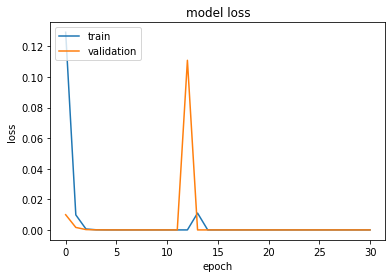

In [16]:
# Training history Statistics

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Save

In [31]:
# Save model
model.save('c_1A.h5') 

import h5py
# save history
h = h5py.File('../history/c_his_1A.h5')
d = history.history
for k, v in d.items():
    h.create_dataset(k, data=np.array(v, dtype=np.float32))

# Analysis

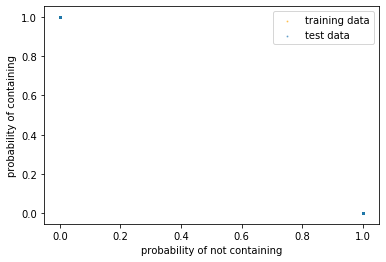

In [33]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()